# GRIP(JUNE 2021): THE SPARKS FOUNDATION

# Name: Tanmay Pandey

# TASK 1:  Prediction using Supervised ML

* Predict the percentage of an student based on the no. of study hours.
* What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
# Importing Required Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the Dataset
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
Dataset = pd.read_csv(url);

# Analysing Dataset


In [3]:
# Checking The Shape Of Dataset
print(Dataset.shape)

(25, 2)


It means dataset have 25 rows and 2 columns

In [4]:
# Viewing First 10 Records
Dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# Describing the data
Dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Checking For Null Values in Data
Dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

We can see there are no null values so data is cleaned

In [7]:
# Finding Correlation of Hours and Scores
Dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Here We a positive correlation which means Hours and Scores are linearly dependent which we can verify using scatterplot

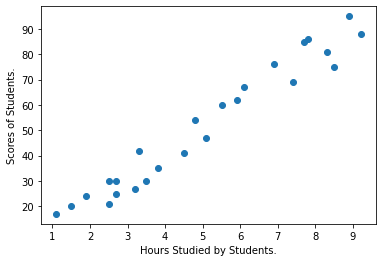

In [8]:
# Plotting Scatter plot of Dataset
plt.scatter(Dataset['Hours'], Dataset['Scores'])
plt.xlabel("Hours Studied by Students.")
plt.ylabel("Scores of Students.")
plt.show()

This scatterplot Depicts that its having a strong linear RelationShip

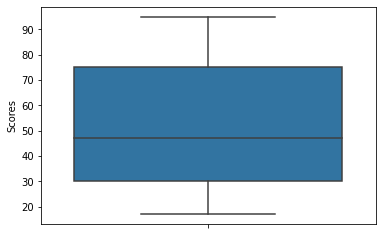

In [9]:
# Checking For Ouliers
sns.boxplot( y="Scores", data = Dataset)

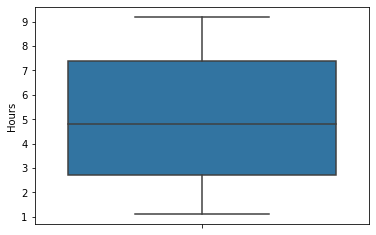

In [10]:
sns.boxplot(y="Hours", data = Dataset)

So The 2 Box Plots Clearly indicates that there are no outliers in dataset.

# Building Linear Regression Model

In [11]:
# Assigning Target Variable(Y) and Non Target Varible(X)
X = Dataset["Hours"].values
Y = Dataset["Scores"].values

# Reshaping X for Linear regression
X = X.reshape(len(X),1)

In [12]:
# Splitting the data into Train and Test variables
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, train_size=0.75 ,random_state=50)

In [13]:
# Importing Linear regression and fitting our data in model
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train, Y_train)

LinearRegression()

# Testing the model

In [14]:
# Predicting Test Data 
y_pred = Lr.predict(X_test)

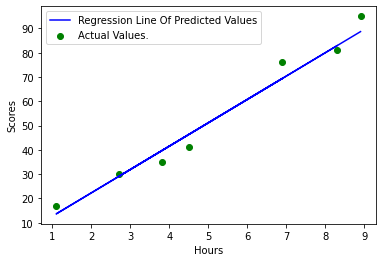

In [15]:
# Plotting Regression line and original Y_train Values
# plotting line
plt.plot(X_test,y_pred, color="blue", label = "Regression Line Of Predicted Values")

# plotting scatter points or actual points
plt.scatter(X_test,Y_test, c="green", label = "Actual Values.")

# Labelling Graph
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()
plt.show()

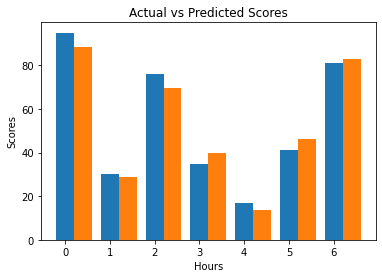

In [16]:
# Plotting Bar Graph for the model
bar1 = np.arange(len(Y_test))
bar2 = [i+0.4 for i in bar1]

plt.bar(bar1, Y_test, 0.4, label='Actual scores')
plt.bar(bar2, y_pred, 0.4, label='Predicted scores')

plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Actual vs Predicted Scores")
plt.show()

In [17]:
# Numerically Our Predicted Values and Actual Predicted values
Act_Pred = pd.DataFrame({"Actual Value":Y_test, "Predicted Values":y_pred})
print(Act_Pred)

   Actual Value  Predicted Values
0            95         88.672009
1            30         29.018054
2            76         69.428798
3            35         39.601820
4            17         13.623485
5            41         46.336944
6            81         82.899045


In [18]:
# Calculating Accuracy Of Model 
from sklearn import metrics
from sklearn.metrics import r2_score

print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, y_pred))
print("R2 Score: ", r2_score(Y_test, y_pred)*100, "%")

Mean Absolute Error:  4.156494887612261
R2 Score:  97.22683933217483 %


# Predicting The Required Answer

In [19]:
hour = 9.25
score = Lr.predict([[hour]])[0]
print("If a Student Studies for {} hours, he will probably obtain {} % score.".format(hour, score))

If a Student Studies for 9.25 hours, he will probably obtain 92.03957065835681 % score.
